In [72]:
# immport modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# load data
data = pd.read_csv("food.dat", sep = "\\s+", header=None)

data.index = data.iloc[:, 0].values.tolist()
data = data.iloc[:, 1:].copy().T

# view data
print(data)

    MA2   EM2   CA2   MA3   EM3   CA3   MA4   EM4   CA4   MA5   EM5   CA5
1   332   293   372   406   386   438   534   460   385   655   584   515
2   428   559   767   563   608   843   660   699   789   776   995  1097
3   354   388   562   341   396   689   367   484   621   423   548   887
4  1437  1527  1948  1507  1501  2345  1620  1856  2366  1848  2056  2630
5   526   567   927   544   558  1148   638   762  1149   759   893  1167
6   247   239   235   324   319   243   414   400   304   495   518   561
7   427   258   433   407   363   341   407   416   282   486   319   284


In [75]:
# standarize data
scaler = StandardScaler()

row_scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
print('Row Scaled Data:')
print(row_scaled_data)

column_scaled_data = pd.DataFrame(scaler.fit_transform(data.T).T, columns=data.columns)
print('Column Scaled Data:')
print(column_scaled_data)

Row Scaled Data:
        MA2       EM2       CA2       MA3       EM3       CA3       MA4  \
0 -0.541060 -0.606838 -0.703680 -0.462474 -0.530775 -0.635261 -0.318152   
1 -0.286265  0.027955  0.033318 -0.055867  0.046429 -0.031113 -0.007054   
2 -0.482670 -0.380126 -0.349174 -0.630815 -0.504774 -0.260839 -0.730479   
3  2.391738  2.338032  2.236848  2.388958  2.368242  2.209456  2.363211   
4 -0.026162  0.047047  0.331849 -0.105074 -0.083572  0.423863 -0.061373   
5 -0.766660 -0.735706 -0.959296 -0.674843 -0.704976 -0.926147 -0.614435   
6 -0.288919 -0.690364 -0.589865 -0.459885 -0.590575 -0.779958 -0.631718   

        EM4       CA4       MA5       EM5       CA5  
0 -0.553053 -0.667998 -0.268833 -0.483984 -0.700053  
1 -0.054799 -0.077839 -0.003137  0.278987  0.106513  
2 -0.503019 -0.323252 -0.778267 -0.550814 -0.184516  
3  2.357250  2.225827  2.350801  2.248604  2.231021  
4  0.076540  0.448045 -0.040466  0.089637  0.203522  
5 -0.678138 -0.786322 -0.620167 -0.606505 -0.636303  
6 -0

In [ ]:
# PCA rows
pca_row = PCA()
row_pca_result = pca_row.fit_transform(row_scaled_data)
row_pca = pd.DataFrame(row_pca_result, index=row_scaled_data.index)

print("Row PCA:")
print(row_pca)

row_pca_components_df = pd.DataFrame(
    pca_row.components_,
    columns=row_scaled_data.columns,
    index=[f"PC{i+1}" for i in range(pca_row.n_components_)],
)

row_pca_components_df["Explained Variance"] = pca_row.explained_variance_ratio_
row_pca_components_df["Cumulative Explained Variance"] = pca_row.explained_variance_ratio_.cumsum()
row_pca_components_df["Most Important Feature"] = row_pca_components_df.iloc[:, :-3].abs().idxmax(axis=1)

print("Row PCA Components:")
print(row_pca_components_df)

Row PCA:
          0         1         2         3         4         5             6
0 -1.868244 -0.394409  0.168131 -0.159121 -0.036428  0.066426 -9.193734e-17
1 -0.006366  0.127627  0.366818  0.026357  0.191445 -0.012419 -9.193734e-17
2 -1.639865  0.545179 -0.154294  0.203347 -0.028118  0.045683 -9.193734e-17
3  7.999629 -0.209179 -0.044056  0.050482 -0.031613  0.003518 -9.193734e-17
4  0.375182  0.600152 -0.120328 -0.233172 -0.038909 -0.029371 -9.193734e-17
5 -2.513990 -0.212357  0.277027  0.101165 -0.132832 -0.051104 -9.193734e-17
6 -2.346346 -0.457011 -0.493298  0.010943  0.076456 -0.022733 -9.193734e-17
Row PCA Components:
          MA2       EM2       CA2       MA3       EM3       CA3       MA4  \
PC1  0.286495  0.291543  0.288547  0.289090  0.290855  0.287400  0.288545   
PC2 -0.272800  0.041330  0.262630 -0.335357 -0.164923  0.399048 -0.342200   
PC3 -0.561209 -0.009643 -0.316292 -0.102485  0.014196 -0.187587  0.193658   
PC4  0.196970  0.334803 -0.193963  0.116164  0.329006 -

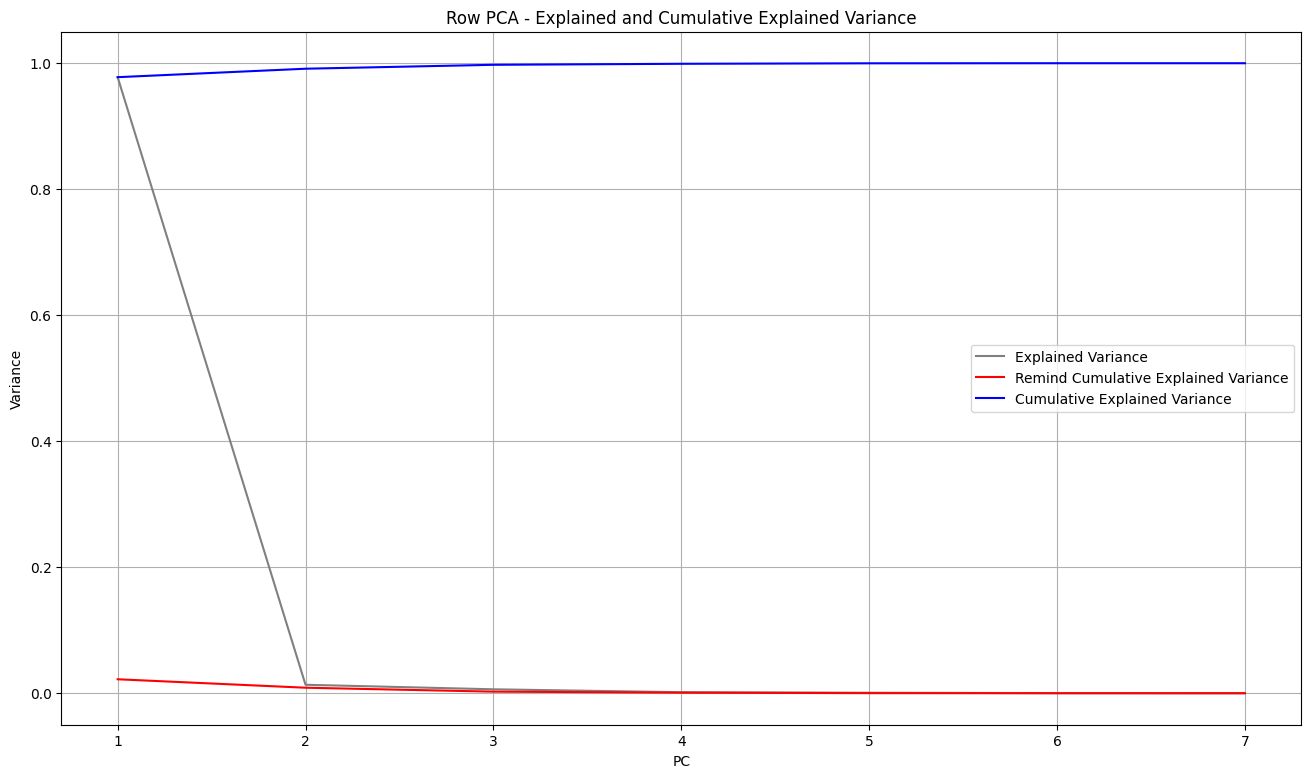

In [86]:
# plot
plt.figure(figsize = (16, 9))
plt.plot(np.arange(1, row_pca_components_df.shape[0] + 1), row_pca_components_df["Explained Variance"], label="Explained Variance", color="gray")
plt.plot(np.arange(1, row_pca_components_df.shape[0] + 1), 1 - row_pca_components_df["Cumulative Explained Variance"], label="Remind Cumulative Explained Variance", color="red")
plt.plot(np.arange(1, row_pca_components_df.shape[0] + 1), row_pca_components_df["Cumulative Explained Variance"], label="Cumulative Explained Variance", color="blue")
plt.xlabel("PC")
plt.ylabel("Variance")
plt.title("Row PCA - Explained and Cumulative Explained Variance")
plt.legend()
plt.grid(True)
plt.show()

In [93]:
# scatter plot
import plotly.express as px
fig = px.scatter(row_pca_components_df.iloc[0:2, 0:12].T,
                 x = "PC1", 
                 y = "PC2", 
                 title = "PC1 and PC2 scatter plot",
                 text = row_pca_components_df.columns[0:12].tolist()
                 )

fig.update_layout(
    width = 600,  # 設定寬度
    height = 600,  # 設定高度
)

fig.update_traces(textposition='top center')
fig.show()

In [81]:
# PCA columns
pca_column = PCA()
column_pca_result = pca_column.fit_transform(column_scaled_data)
column_pca = pd.DataFrame(column_pca_result, index=column_scaled_data.index)

column_pca_components_df = pd.DataFrame(
    pca_column.components_,
    columns=column_scaled_data.columns,
    index=[f"PC{i+1}" for i in range(pca_column.n_components_)],
    
)

column_pca_components_df["Explained Variance"] = pca_column.explained_variance_ratio_
column_pca_components_df["Cumulative Explained Variance"] = pca_column.explained_variance_ratio_.cumsum()
column_pca_components_df["Most Important Feature"] = column_pca_components_df.iloc[:, :-3].abs().idxmax(axis=1)

print("Column PCA:")
print(column_pca)
print("Column PCA Components:")
print(column_pca_components_df)

Column PCA:
          0         1         2         3         4         5             6
0 -1.701942  1.360219  0.840233 -0.044384  0.238393  0.007134  2.264462e-16
1  1.144921  0.687465  0.105272  0.670755 -0.156285 -0.020499  2.264462e-16
2  1.914976 -0.627804 -0.652945  0.102676  0.320342  0.027410  2.264462e-16
3  1.787251 -0.496863  0.130952 -0.336405 -0.021336 -0.095341  2.264462e-16
4  1.788133 -0.990634  0.480189 -0.210795 -0.184372  0.075002  2.264462e-16
5 -1.049425  1.994070 -0.720663 -0.271029 -0.149973  0.015470  2.264462e-16
6 -3.883915 -1.926454 -0.183038  0.089182 -0.046769 -0.009176  2.264462e-16
Column PCA Components:
          MA2       EM2       CA2       MA3       EM3       CA3       MA4  \
PC1 -0.272706  0.129363  0.028871 -0.261451 -0.133631  0.343295 -0.287760   
PC2 -0.339671  0.017257 -0.487813 -0.055247  0.011929 -0.320751  0.204757   
PC3 -0.331895 -0.212928  0.032846 -0.148221 -0.245688  0.462417  0.184572   
PC4 -0.264818  0.031772  0.594187 -0.023318  0.20

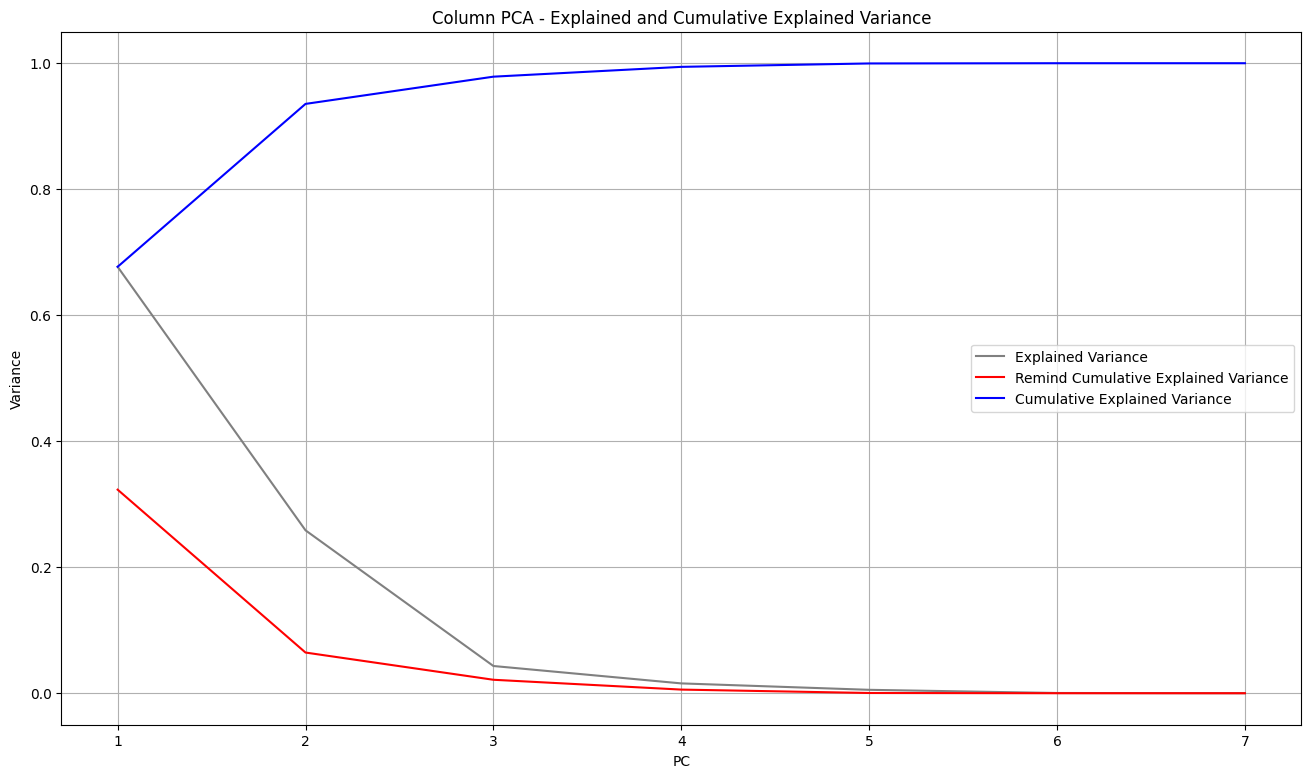

In [87]:
# plot
plt.figure(figsize = (16, 9))
plt.plot(np.arange(1, column_pca_components_df.shape[0] + 1), column_pca_components_df["Explained Variance"], label="Explained Variance", color="gray")
plt.plot(np.arange(1, column_pca_components_df.shape[0] + 1), 1 - column_pca_components_df["Cumulative Explained Variance"], label="Remind Cumulative Explained Variance", color="red")
plt.plot(np.arange(1, column_pca_components_df.shape[0] + 1), column_pca_components_df["Cumulative Explained Variance"], label="Cumulative Explained Variance", color="blue")
plt.xlabel("PC")
plt.ylabel("Variance")
plt.title("Column PCA - Explained and Cumulative Explained Variance")
plt.legend()
plt.grid(True)
plt.show()

In [92]:
# scatter plot
import plotly.express as px
fig = px.scatter(column_pca_components_df.iloc[0:2, 0:12].T,
                 x = "PC1", 
                 y = "PC2", 
                 title = "PC1 and PC2 scatter plot",
                 text = row_pca_components_df.columns[0:12].tolist()
                 )

fig.update_layout(
    width = 600,  # 設定寬度
    height = 600,  # 設定高度
)

fig.update_traces(textposition='top center')
fig.show()